#Crowdfunding Campaign Success Prediction

The goal of this assignment is to develop and evaluate predictive classifier models to determine the success of crowdfunding campaigns based on a variety of campaign features. The dataset includes factors such as financial goals, actual funds raised, campaign duration, and backer engagement. By building and comparing three distinct machine learning models — Random Forest, Naive Bayes, and Support Vector Machine (SVM) — you will assess which model best predicts the success of crowdfunding efforts.


In [ ]:
#nessary labries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset Link:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/crowdfunding_campaign.csv")

#Machine Learning Model Building Steps:-
##1.	Data Preprocessing:


#Load the Dataset:

In [ ]:
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CampaignID           100000 non-null  object 
 1   GoalAmount           100000 non-null  int64  
 2   RaisedAmount         100000 non-null  float64
 3   DurationDays         100000 non-null  int64  
 4   NumBackers           100000 non-null  int64  
 5   Category             100000 non-null  object 
 6   LaunchMonth          100000 non-null  object 
 7   Country              100000 non-null  object 
 8   Currency             100000 non-null  object 
 9   OwnerExperience      100000 non-null  int64  
 10  VideoIncluded        100000 non-null  object 
 11  SocialMediaPresence  100000 non-null  int64  
 12  NumUpdates           100000 non-null  int64  
 13  IsSuccessful         100000 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 10.7+ MB


In [ ]:
df.describe()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50538.001310,50598.121803,52.047370,1003.347340,9.489130,50077.301010,24.483230,0.500940
std,28613.822592,33255.277493,21.653238,574.485153,5.763538,28767.521522,14.413833,0.500002
min,1000.000000,528.632349,15.000000,10.000000,0.000000,100.000000,0.000000,0.000000
25%,25724.750000,23396.500017,33.000000,505.000000,4.000000,25276.750000,12.000000,0.000000
50%,50706.000000,45980.674476,52.000000,1003.000000,9.000000,50024.500000,25.000000,1.000000
75%,75316.000000,72790.183158,71.000000,1502.000000,14.000000,74934.250000,37.000000,1.000000
max,99999.000000,149238.361559,89.000000,1999.000000,19.000000,99999.000000,49.000000,1.000000


###In the Dataset we have
- Total count is 1,00,000
- Maximum DurationDays is 89 days
- Minimum DurationDays  is 15 days
- Maximum GoalAmount is $99,999

- Minimum GoalAmount is $1000

- Maximum RaisedAmount is $1,49,238

- Minimum RaisedAmount is $528

#Handle Missing Values:

In [ ]:
df.isna().sum()

,0
CampaignID,0
GoalAmount,0
RaisedAmount,0
DurationDays,0
NumBackers,0
Category,0
LaunchMonth,0
Country,0
Currency,0
OwnerExperience,0


#Encode Categorical Features:

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
Categorical_Features = df[['Category',	'LaunchMonth',	'Country',	'Currency','VideoIncluded']]
le = LabelEncoder()
for col in Categorical_Features:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,1,11,0,3,11,1,41758,3,0
1,CID_00001,69394,60068.683288,49,469,0,10,0,3,7,1,79112,48,0
2,CID_00002,18652,22958.153470,58,148,1,3,4,2,17,0,3942,9,1
3,CID_00003,19487,24229.048390,39,780,1,10,2,0,10,0,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,2,11,0,0,12,1,72568,17,0


In [ ]:
df['Category'].unique()
print('\n'.join(['Art - 0','Film - 1','Games - 2','Music - 3','Technology - 4']))

Art - 0
Film - 1
Games - 2
Music - 3
Technology - 4


In [ ]:
df['LaunchMonth'].unique()
print('\n'.join(['April - 0', 'August - 1','December - 2','February - 3','January - 4', 'July - 5',
'June - 6', 'March - 7', 'May - 8', 'November - 9', 'October - 10', 'September - 11',]))

April - 0
August - 1
December - 2
February - 3
January - 4
July - 5
June - 6
March - 7
May - 8
November - 9
October - 10
September - 11


In [ ]:
df['Country'].unique()
print('\n'.join(['Australia -  0','USA - 1','Germany - 2','UK - 3','Canada - 4']))

Australia -  0
USA - 1
Germany - 2
UK - 3
Canada - 4


In [ ]:
df['Currency'].unique()
print('\n'.join(['EUR- 0', 'GBP- 1', 'AUD- 2', 'CAD- 3', 'USD- 4']))

EUR- 0
GBP- 1
AUD- 2
CAD- 3
USD- 4


In [ ]:
df['VideoIncluded'].unique()
print('\n'.join(['No - 0', 'Yes - 1']))

No - 0
Yes - 1


#Feature Selection:

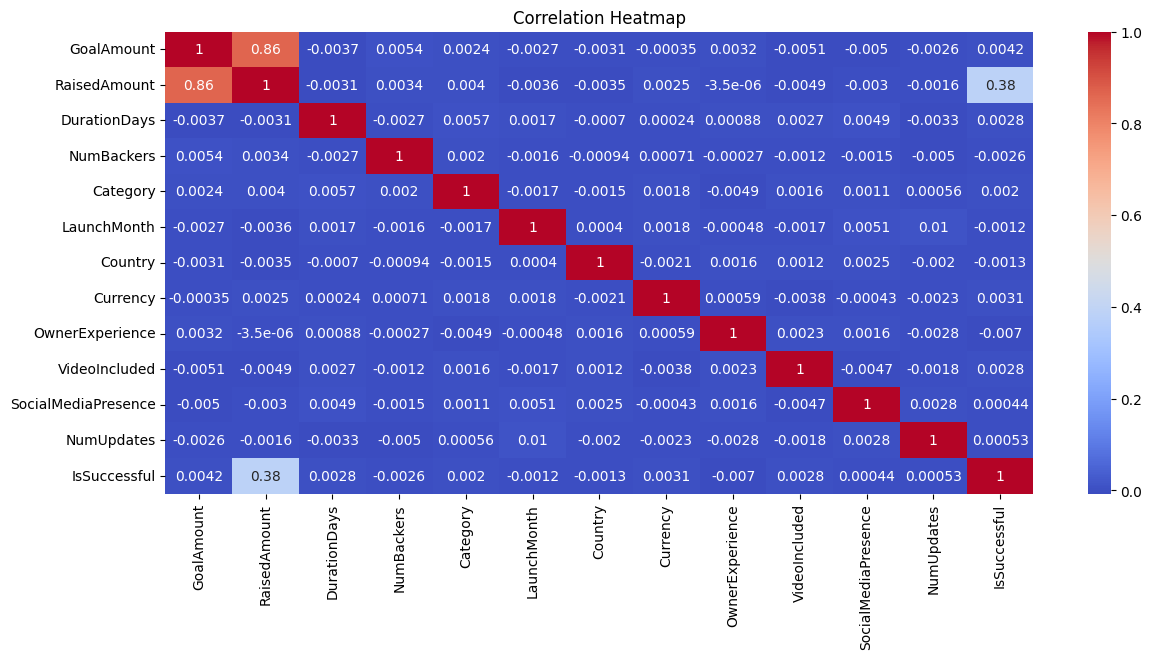

In [ ]:
df_corr = df.drop(columns=['CampaignID']).corr()

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_model = df.drop(columns=['CampaignID'])

In [ ]:
X=df_model.drop("IsSuccessful",axis=1) # X is Feature
X.head()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates
0,76159,73518.028955,15,1903,1,11,0,3,11,1,41758,3
1,69394,60068.683288,49,469,0,10,0,3,7,1,79112,48
2,18652,22958.153470,58,148,1,3,4,2,17,0,3942,9
3,19487,24229.048390,39,780,1,10,2,0,10,0,22047,35
4,26734,17984.630311,68,1622,2,11,0,0,12,1,72568,17


In [ ]:
y = df_model['IsSuccessful'] # y is Target
y.head()

,IsSuccessful
0,0
1,0
2,1
3,1
4,0


#Data Splitting:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(f" Dataset.shape : {df.shape} ")
print(f" X_train.shape : {X_train.shape} ")
print(f" X_test.shape : {X_test.shape} ")
print(f" y_train.shape : {y_train.shape} ")
print(f" y_test.shape : {y_test.shape} ")

 Dataset.shape : (100000, 14) 
 X_train.shape : (80000, 12) 
 X_test.shape : (20000, 12) 
 y_train.shape : (80000,) 
 y_test.shape : (20000,) 


#Feature Scaling:

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#2.	Random Forest - Model Building and Evaluation:

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix

n_estimators=50, max_depth=5 --> Accuracy: 0.7516
n_estimators=50, max_depth=10 --> Accuracy: 0.8410
n_estimators=100, max_depth=5 --> Accuracy: 0.7401
n_estimators=100, max_depth=10 --> Accuracy: 0.8451

Final Model Evaluation:
_________________________
Accuracy: 0.84515
Confusion Matrix:
 [[9857   96]
 [3001 7046]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.86      9953
           1       0.99      0.70      0.82     10047

    accuracy                           0.85     20000
   macro avg       0.88      0.85      0.84     20000
weighted avg       0.88      0.85      0.84     20000



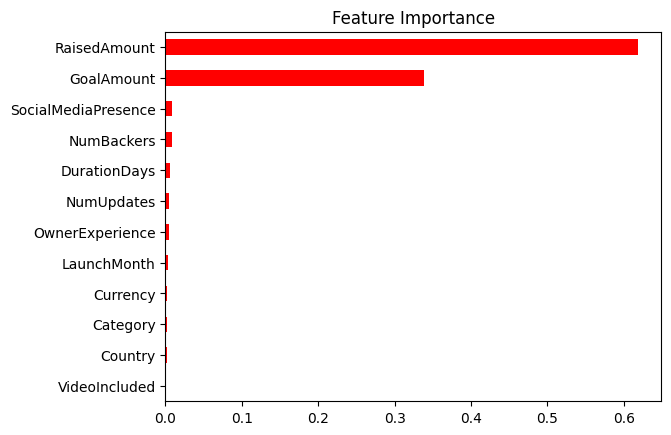

In [ ]:
#Model Evaluation:
n_estimators_list = [50, 100]
max_depth_list = [5, 10]

for n in n_estimators_list:
    for d in max_depth_list:

        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

#Model Evaluation:
        acc = accuracy_score(y_test, y_pred)
        print(f"n_estimators={n}, max_depth={d} --> Accuracy: {acc:.4f}")

print("\nFinal Model Evaluation:")
print("_"*25)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='red')
plt.title('Feature Importance')
plt.show()

#3.	Naive Bayes - Model Building and Evaluation:

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [ ]:
# Gaussian
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

#Model Evaluation :
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Naive Bayes Model Evaluation:")
print("_"*30)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Naive Bayes Model Evaluation:
______________________________
Accuracy: 0.6619
Confusion Matrix:
 [[8054 1899]
 [4863 5184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.81      0.70      9953
           1       0.73      0.52      0.61     10047

    accuracy                           0.66     20000
   macro avg       0.68      0.66      0.65     20000
weighted avg       0.68      0.66      0.65     20000



In [ ]:
# Bernoulli
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = bnb_model.predict(X_test)

print("Bernoulli Naive Bayes Evaluation:")
print("_"*35)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Bernoulli Naive Bayes Evaluation:
___________________________________
Accuracy: 0.49945
Confusion Matrix:
 [[5192 4761]
 [5250 4797]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51      9953
           1       0.50      0.48      0.49     10047

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [ ]:
# Multinomial
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = mnb_model.predict(X_test)

print("Multinomial Naive Bayes Evaluation:")
print("_"*35)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Multinomial Naive Bayes Evaluation:
___________________________________
Accuracy: 0.7002
Confusion Matrix:
 [[7231 2722]
 [3274 6773]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      9953
           1       0.71      0.67      0.69     10047

    accuracy                           0.70     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.70      0.70      0.70     20000



#4.	Support Vector Machine (SVM) - Model Building and Evaluation:

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
#Model Evaluation:
y_pred = svm_rbf.predict(X_test_scaled)

print("SVM with RBF Kernel - Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM with RBF Kernel - Evaluation:
Accuracy: 0.9742
Confusion Matrix:
 [[9757  196]
 [ 320 9727]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      9953
           1       0.98      0.97      0.97     10047

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



#5.	Comparison and Analysis:

###Compare the accuracy scores of the three models.

In [ ]:
model_compare = [["Random Forest",0.84515],
                ["Naive Bayes",0.7002],
                ["SVC",0.9742]]
model_compare_accuracy_scores = pd.DataFrame(model_compare, columns=['Model','Accuracy'])
model_compare_accuracy_scores

,Model,Accuracy
0,Random Forest,0.84515
1,Naive Bayes,0.70020
2,SVC,0.97420


#Discuss which model performed best and why, based on the accuracy scores and other relevant factors
Best Model: SVC (Support Vector Classifier)

Highest Accuracy (0.97420):

- It outperforms all other models by a large margin, indicating excellent classification ability for your dataset.
- If we have dataset has many features, SVC usually performs better than simpler models.
- SVM with RBF kernel handles non-linear relationships very well.

#Reflect on the strengths and weaknesses of each model in the context of this dataset.
 1. Support Vector Classifier (SVC)
Accuracy: 0.97420

Strengths:

- Very high accuracy – indicates excellent model fit on your dataset.
- Very high accuracy – indicates excellent model fit on your dataset.

Weaknesses:
- Slower training time – especially with large datasets.
____
2. Random Forest
Accuracy: 0.84515

Strengths:
- Handles both linear and non-linear data – robust to various data types
- Feature importance insights – useful for understanding your dataset.

Weaknesses:
- Less accurate than SVC in this case.
___
 3. Naive Bayes
Accuracy: 0.70020

Strengths:
- Very fast and simple – good for quick baseline results.
- Performs well with small datasets.

Weaknesses:
- Lowest accuracy – underperforms with your dataset.

